## 手書き数字認識

このデータセットは、手書きの数字（0から9までの10種類）に関する画像データを収集したものです。各画像は8×8ピクセルのグレースケール画像であり、64個の特徴量（ピクセルの明るさ）から構成されています。

このデータセットは、機械学習のアルゴリズムを訓練して手書き数字の認識を行うために使用されます。各サンプルは、0から9のいずれかの数字を表しており、その数字は各画像のラベル（ターゲット）として提供されます。

データセットに含まれる主な情報は以下の通りです：

- 特徴量：各画像は8×8ピクセルで、合計64の特徴量（ピクセルの明るさ）があります。
- ターゲット：各画像が表す数字（0から9のいずれか）がラベルとして与えられます。

## 1. 基本統計量の算出

### GPT スクリプト : データのインポート
* from sklearn.datasets import load_digits を利用
* load_digits() でdigitsデータセットをロード
* 特徴量を含むデータフレームに変換する。ターゲット列をデータフレームに追加する
* データフレーム名はdfとする
* データフレームdfを表示する
* Pythonコード

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

# データセットをロード
digits_data = load_digits()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(digits_data.data, columns=digits_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = digits_data.target

# データフレームdfを表示する
df


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


各レコードを画像で表示

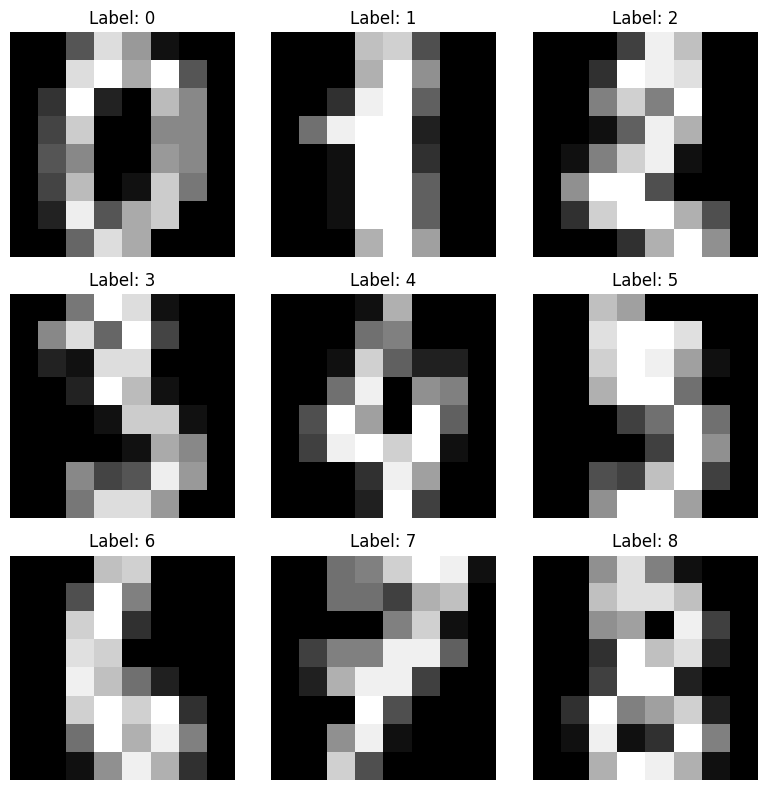

In [2]:
import matplotlib.pyplot as plt

# 最初の9つのサンプルを表示する
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits_data.images[i], cmap='gray')  # 注意: '_r' を追加して逆色表示にする
    ax.set_title(f"Label: {digits_data.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 6. ベイジアンネットワーク

ベイジアンネットワーク（Bayesian Network）は、確率的グラフィカルモデルの一種であり、変数間の依存関係を表現するために使用されます。ベイジアンネットワークは、確率的な因果関係や依存関係をグラフの形式で表現し、ベイジアン統計学の原理に基づいて推論や予測を行うためのツールです。

ベイジアンネットワークの概要：

1. **ノード（Nodes）**：
   - ノードは変数を表し、その変数が表す事象を示します。例えば、病気の有無、症状の有無、治療法などがノードになります。

2. **エッジ（Edges）**：
   - エッジはノード間の依存関係を表します。あるノードから別のノードへのエッジがある場合、それらの変数間には因果関係や依存関係が存在することを示します。

3. **条件付き確率表（Conditional Probability Tables, CPT）**：
   - 各ノードには、そのノードが他のノードに依存する場合の条件付き確率が含まれます。これは、ノードの親ノードの状態に応じて、そのノードが特定の状態になる確率を示します。

4. **グラフ構造**：
   - ベイジアンネットワークは、ノードとエッジのグラフ構造で表されます。このグラフ構造は、変数間の因果関係や依存関係を視覚的に示します。

ベイジアンネットワークの分析の流れ：

1. **モデルの構築**：
   - 分析の最初のステップは、ベイジアンネットワークの構築です。これには、問題領域の理解、変数の特定、変数間の因果関係の推定が含まれます。

2. **データの収集と前処理**：
   - モデルを構築するために、関連するデータを収集し、適切な形式に前処理します。これには欠損値の処理、データの変換、外れ値の除去などが含まれます。離散化のプロセスも重要。

3. **モデルの学習**：
   - データが利用可能な場合、ベイジアンネットワークのパラメータ（条件付き確率表）を学習します。これには、最尤推定やベイズ推定などの手法が使用されます。

4. **モデルの評価**：
   - 学習されたベイジアンネットワークを評価し、モデルの適合度や予測性能を評価します。これには、交差検証や情報規準などの手法が使用されます。構造学習で自動的にネットワークを作ることも多い。

5. **モデルの利用**：
   - 最終的に、学習されたベイジアンネットワークを使用して推論や予測を行います。これには、未知の事象の予測、因果関係の解明、意思決定支援などが含まれます。

ベイジアンネットワークは、医療診断、リスク評価、金融モデリング、自然言語処理など、さまざまな領域で幅広く活用されています。

### 6.1 データの離散化

### GPT プロンプト : データの離散化
* 与えられたデータフレーム df をコピーし、非数値列を除外して数値列のみを取得する
* Targetを除くその他の各数値特徴量を等頻度ビニングで3つのカテゴリ(Low, Medium, High)に分割し、新しいカテゴリ列を作成する
* Targetはカテゴリカル変数なので、そのまま利用する
* 離散化されたデータのみを含む新しいデータフレーム df_discrete を作成し、それをCSVファイルとして保存する
* Pythonコード

In [3]:
import pandas as pd

# 仮想のデータフレームdfを想定しています。実際のデータフレームを用いてください。
# df = pd.DataFrame({
#     'feature1': [...],
#     'feature2': [...],
#     ...
#     'target': [...]
# })

# 数値列のみを取得し、'target'を除く
numeric_columns = df.select_dtypes(include=['number']).columns.drop('target')

df_discrete = pd.DataFrame()
for column in numeric_columns:
    # ユニークな値が3つ未満の場合はその列を利用しない
    if df[column].nunique() < 3:
        continue

    try:
        df_discrete[column + '_category'] = pd.qcut(df[column], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
    except ValueError as e:
        print(f"列 '{column}' でエラーが発生しました: {e}")
        # エラーが発生した場合、その列はカテゴリ分割せずにスキップします。

# Target列をそのまま追加
df_discrete['target'] = df['target']

# CSVファイルとして保存
df_discrete.to_csv('discrete_data.csv', index=False)

# 結果を表示
df_discrete


列 'pixel_0_1' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_0_6' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_0_7' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_1_0' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_1_1' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_1_6' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_1_7' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_2_0' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_2_1' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_2_6' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_2_7' でエラーが発生しました: Bin labels must be one fewer than the number of bin edges
列 'pixel_3_1' でエラーが発生しました: Bin labels must be one fewer than the 

,pixel_0_2_category,pixel_0_3_category,pixel_0_4_category,pixel_0_5_category,pixel_1_2_category,pixel_1_3_category,pixel_1_4_category,pixel_1_5_category,pixel_2_2_category,pixel_2_3_category,...,pixel_5_5_category,pixel_6_2_category,pixel_6_3_category,pixel_6_4_category,pixel_6_5_category,pixel_7_2_category,pixel_7_3_category,pixel_7_4_category,pixel_7_5_category,target
0,Medium,Medium,Low,Low,Medium,Medium,Medium,High,High,Low,...,Medium,High,Low,Medium,Medium,Medium,Medium,Low,Low,0
1,Low,Medium,Medium,Medium,Low,Low,High,Medium,Low,High,...,Medium,Low,High,High,Medium,Low,Low,High,Medium,1
2,Low,Low,Medium,High,Low,High,High,High,Low,High,...,Low,High,High,High,Medium,Low,Low,Low,High,2
3,Medium,High,Medium,Low,Medium,Low,High,Low,Low,High,...,Medium,Medium,Low,Low,High,Medium,Medium,Medium,Medium,3
4,Low,Low,Low,Low,Low,Low,Low,Low,Low,High,...,High,Low,Low,High,Medium,Low,Low,High,Medium,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,Medium,Low,Medium,Medium,High,Medium,Medium,High,High,Medium,...,High,Medium,Low,Low,High,Low,Medium,Medium,Medium,9
1793,Medium,High,Medium,High,High,Medium,Medium,High,High,Medium,...,High,High,High,High,High,Medium,High,Medium,Medium,0
1794,Low,Low,Medium,Low,Medium,High,Low,Low,High,High,...,High,High,High,High,High,Low,Low,Medium,Medium,8
1795,Low,Low,Low,Low,Medium,High,High,High,High,Medium,...,High,Low,Low,Low,High,Medium,Low,High,High,9


### 6.2 構造学習(pgmpy利用)

ベイジアンネットワークの構造学習は、与えられたデータから最適なベイジアンネットワークの構造（つまり、ノード間の依存関係や結合強度）を推定するタスクです。ベイジアンネットワークは、変数間の因果関係を表現するための確率的なグラフモデルであり、構造学習はそのグラフ構造を特定するための手法です。

ベイジアンネットワークの構造学習には、主に2つのアプローチがあります。

1. 制約ベースの学習（Constraint-Based Learning）: このアプローチでは、データセットから条件付き独立性を見つけ出し、それを使用してベイジアンネットワークの構造を推定します。代表的なアルゴリズムとしては、PCアルゴリズム（PC algorithm）やGESアルゴリズム（Greedy Equivalence Search algorithm）などがあります。これらのアルゴリズムは、データから条件付き独立性を推定し、それを基にネットワークの構造を推測します。

2. スコアベースの学習（Score-Based Learning）: このアプローチでは、ネットワーク構造の候補を評価するスコア関数を定義し、最適な構造を選択します。代表的なアルゴリズムには、ベイジアン情報規準（Bayesian Information Criterion、BIC）や最大事後確率（Maximum A Posteriori、MAP）推定を使用する方法があります。これらのアルゴリズムは、モデルの複雑さとフィット度をバランスさせることで最適なモデルを見つけます。

構造学習の目的は、与えられたデータに最も適合するベイジアンネットワークの構造を見つけることです。適切な構造を持つベイジアンネットワークは、データの生成プロセスを正確にモデル化し、変数間の因果関係を理解するのに役立ちます。

In [4]:
!pip install pgmpy

### GPT プロンプト : 構造学習

* `pgmpy` ライブラリから必要なモジュールをインポートする。
* 離散化されたデータフレーム`df_discrete`を利用する
* `pgmpy.estimators.HillClimbSearch` を使用して、BICスコアを指標として最適なモデル構造を探索する。
* 探索された最適なモデル構造を使用して、`pgmpy.models.BayesianModel` を初期化する。
* モデルのパラメータ学習には、最尤推定法 (`pgmpy.estimators.MaximumLikelihoodEstimator`) を使用する。
* 学習された条件付き確率表（CPT）を表示する。


In [5]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator

# BICスコアを用いたヒルクライミング検索を初期化
hc = HillClimbSearch(df_discrete)

# BICスコアを指定して最適なモデル構造を推定
best_model = hc.estimate(scoring_method=BicScore(df_discrete))
print("Best model structure:", best_model.edges())

# モデルの初期化
model = BayesianModel(best_model.edges())

# パラメータ学習（最尤推定法を使用）
model.fit(df_discrete, estimator=MaximumLikelihoodEstimator)

# 学習された条件付き確率表（CPT）の表示
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


  0%|          | 0/1000000 [00:00<?, ?it/s]

Best model structure: [('pixel_0_2_category', 'pixel_7_2_category'), ('pixel_0_2_category', 'pixel_7_4_category'), ('pixel_0_4_category', 'pixel_0_5_category'), ('pixel_0_5_category', 'target'), ('pixel_0_5_category', 'pixel_1_5_category'), ('pixel_0_5_category', 'pixel_2_5_category'), ('pixel_1_2_category', 'pixel_0_2_category'), ('pixel_1_2_category', 'pixel_2_2_category'), ('pixel_1_3_category', 'pixel_1_4_category'), ('pixel_1_5_category', 'pixel_1_4_category'), ('pixel_2_3_category', 'pixel_1_3_category'), ('pixel_2_4_category', 'pixel_1_4_category'), ('pixel_2_4_category', 'pixel_3_4_category'), ('pixel_2_5_category', 'target'), ('pixel_2_5_category', 'pixel_1_5_category'), ('pixel_3_3_category', 'pixel_2_3_category'), ('pixel_3_5_category', 'pixel_2_4_category'), ('pixel_4_3_category', 'pixel_4_2_category'), ('pixel_4_3_category', 'pixel_3_3_category'), ('pixel_4_5_category', 'pixel_5_5_category'), ('pixel_4_5_category', 'pixel_3_5_category'), ('pixel_4_5_category', 'pixel_5_4_c

### GPT プロンプト

* 学習されたベイジアンネットワークの構造は、以下のエッジで与えられる：`best_model.edges()`
* グラフ描画には、`networkx`と`matplotlib`を使用する。
* 描画されたグラフは、ノードとエッジを明確に区別し、エッジには矢印が表示されるようにする。
* ノードのラベル、ノードの大きさ、ノードの色、フォントサイズなどの詳細な描画設定を適切に調整する。
* 学習されたベイジアンネットワークの構造を可視化したグラフを出力する。

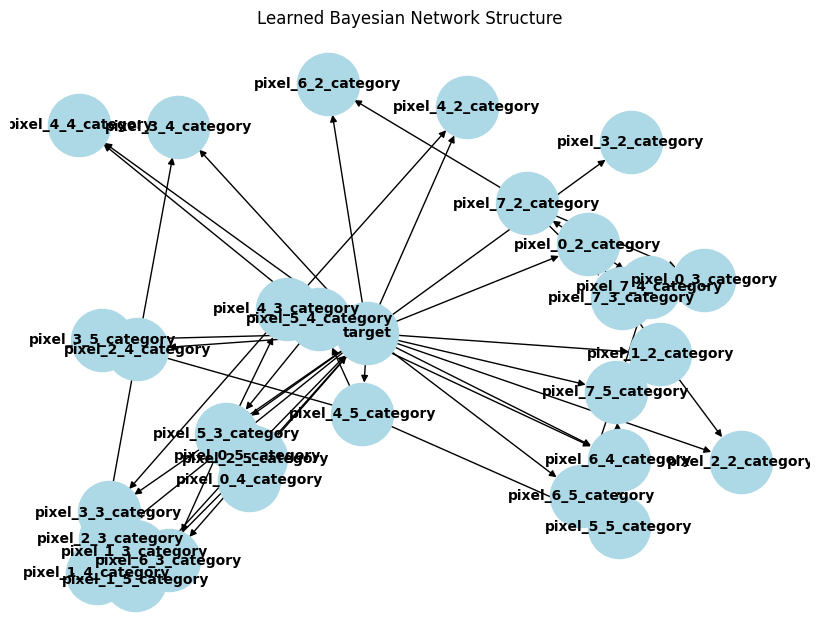

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# 学習されたベイジアンネットワークのエッジを取得
edges = best_model.edges()

# ベイジアンネットワークのグラフオブジェクトを作成
G = nx.DiGraph(edges)

# グラフの描画
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # ノードの配置アルゴリズムを指定
nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Learned Bayesian Network Structure")
plt.show()


## 6.3 確率的推論の実施

In [7]:
from pgmpy.inference import VariableElimination

# 推論オブジェクトの作成
inference = VariableElimination(model)

# 特定の変数の確率分布をクエリ
result = inference.query(variables=['pixel_3_4_category'], evidence={'target': 0})

# 結果の表示
print(result)


+----------------------------+---------------------------+
| pixel_3_4_category         |   phi(pixel_3_4_category) |
+============================+===========================+
| pixel_3_4_category(High)   |                    0.0000 |
+----------------------------+---------------------------+
| pixel_3_4_category(Low)    |                    1.0000 |
+----------------------------+---------------------------+
| pixel_3_4_category(Medium) |                    0.0000 |
+----------------------------+---------------------------+


In [8]:
from pgmpy.inference import VariableElimination

# 推論オブジェクトの作成
inference = VariableElimination(model)

# 特定の変数の確率分布をクエリ
result = inference.query(variables=['pixel_3_4_category'], evidence={'target': 5})

# 結果の表示
print(result)


+----------------------------+---------------------------+
| pixel_3_4_category         |   phi(pixel_3_4_category) |
+============================+===========================+
| pixel_3_4_category(High)   |                    0.1374 |
+----------------------------+---------------------------+
| pixel_3_4_category(Low)    |                    0.4341 |
+----------------------------+---------------------------+
| pixel_3_4_category(Medium) |                    0.4286 |
+----------------------------+---------------------------+
